In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_into = pd.read_csv('/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/TinySOL_metadata.csv')
df_into= df_into[df_into['Needed digital retuning']]
notes = list(df_into['Pitch'].unique())

In [3]:
def hist_sum(freqs, sp, bins, sp_sum):
    min_max_freq = np.arange(0,4000,1)
    interval = int(len(min_max_freq)/bins)
    freq_ranges = [(min(min_max_freq[i*interval:(i+1)*interval]),max(min_max_freq[i*interval:(i+1)*interval])) for i in range(0,bins)]
#    print(freq_ranges)
    for kk in range(0,len(freqs)):
        freq = freqs[kk]
        for rangee in freq_ranges:
            ###### DUDA AQUI
            rangee_string = str(rangee)
            ###############
            ###### DUDA AQUI 2
            if freq in range(int(rangee[0]),int(rangee[1])):
                try:
                    sp_sum[rangee_string] += sp[kk]
                except:
                    sp_sum[rangee_string] = sp[kk]
            else:
                try:
                    sp_sum[rangee_string] += 0
                except:
                    sp_sum[rangee_string] = 0
            ###############
    return sp_sum

In [4]:
for note in notes_scale:
    df_dumm = pd.read_csv('/home/jacs/Documents/DataScience/Personal/song_similarity/melodic_contour/f2/F2_freq.csv')
    sp_sum = {}
    for ii in range(0,len(df_dumm)):
        freqos = df_dumm.iloc[ii]['10_freq']
        freqos = freqos.replace('[','').replace(']','').split(', ')
        freqos = [float(freqo) for freqo in freqos]
        spos = df_dumm.iloc[ii]['10_peak']
        spos = spos.replace('[','').replace(']','').split(', ')
        spos = [float(spo) for spo in spos]
        sp_sum = hist_sum(freqos, spos, 40, sp_sum)

In [7]:
pd.read_csv('notes.csv')

,NOTE,OCTAVE 0 (Hz),OCTAVE 1 (Hz),OCTAVE 2 (Hz),OCTAVE 3 (Hz),OCTAVE 4 (Hz),OCTAVE 5 (Hz),OCTAVE 6 (Hz),OCTAVE 7 (Hz),OCTAVE 8 (Hz),Unnamed: 10
0,C,16.35,32.70,65.41,130.81,261.63,523.25,1046.50,2093.00,4186.01,NaN
1,C#/Db,17.32,34.65,69.30,138.59,277.18,554.37,1108.73,2217.46,4434.92,NaN
2,D,18.35,36.71,73.42,146.83,293.66,587.33,1174.66,2349.32,4698.63,NaN
3,D#/Eb,19.45,38.89,77.78,155.56,311.13,622.25,1244.51,2489.02,4978.03,NaN
4,E,20.60,41.20,82.41,164.81,329.63,659.25,1318.51,2637.02,5274.04,NaN
5,F,21.83,43.65,87.31,174.61,349.23,698.46,1396.91,2793.83,5587.65,NaN
6,F#/Gb,23.12,46.25,92.50,185.00,369.99,739.99,1479.98,2959.96,5919.91,NaN
7,G,24.50,49.00,98.00,196.00,392.00,783.99,1567.98,3135.96,6271.93,NaN
8,G#/Ab,25.96,51.91,103.83,207.65,415.30,830.61,1661.22,3322.44,6644.88,NaN
9,A,27.50,55.00,110.00,220.00,440.00,880.00,1760.00,3520.00,7040.00,NaN


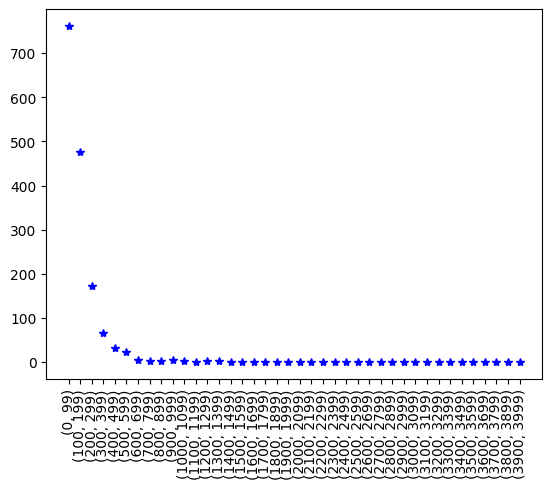

In [21]:
plt.figure()
plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*b')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()